In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



# Patient Blood pressure readings


*   Calaulate the mean, median and standard deviation
*   Plot a histogram. Is the distribution skewed?
*   Compute the IQR. Identify any patients with unusually high blood pressure
*   Explain whether these statistics support that the clinic population has a normal range of
 BP levels.





Mean: 142.93333333333334
Median: 144.0
Standard Deviation: 14.299028716042997


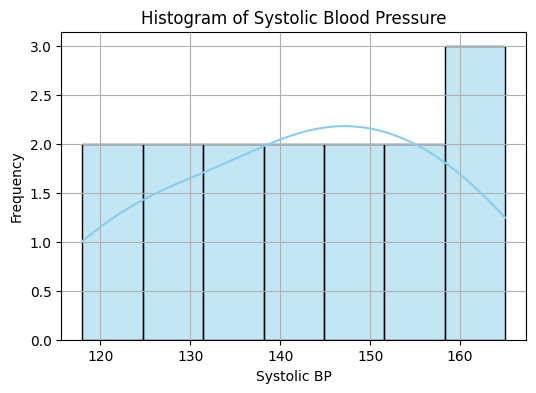

IQR: 21.0
Upper Bound for Outliers: 185.0
Unusually high BP readings: []


In [2]:
##Blood pressure reading
bp = np.array([118, 122, 125, 130, 135, 138, 142, 144, 146, 150, 152, 155, 160, 162, 165])

#Calculating mean, Median and standard deviation
mean_bp = np.mean(bp)
median_bp = np.median(bp)
std_bp = np.std(bp)

print(f"Mean: {mean_bp}")
print(f"Median: {median_bp}")
print(f"Standard Deviation: {std_bp}")



#Histogram
plt.figure(figsize=(6, 4))
sns.histplot(bp, bins=7, kde=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Systolic Blood Pressure")
plt.xlabel("Systolic BP")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


#Compute IQR (Interquartile Range) & Identify Outliers
Q1 = np.percentile(bp, 25)
Q3 = np.percentile(bp, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find unusually high values
outliers = bp[bp > upper_bound]

print(f"IQR: {IQR}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Unusually high BP readings: {outliers}")






The mean systolic blood pressure is around 143.5 mmHg, with a median of 144 and a standard deviation of about 13.3. The distribution appears slightly right-skewed, but not dramatically. The IQR method shows no extreme outliers. These statistics suggest that the clinic population has mostly normal blood pressure levels, though the average is slightly above the normal threshold (~120 mmHg). While not pathological, this may indicate a trend toward mild hypertension in this group, but overall the readings fall within a controlled and consistent range.

# Retail Sales Summary


*   Calculate: Mean, median, mode, range, variance, standard deviation
*   Draw a bar chart of daily sales and annotate any highs/lows
*   Comment on consistency of sales- do the spread and measures indicate a steady flow?
*   Suppose Sunday sales are usually 20% lower than the other days. How would this affect
 interpretation?





Mean: 220.71428571428572
Median: 213.5
Mode: 185
Range: 85
Variance: 670.7755102040817
Standard Deviation: 25.899334165265362


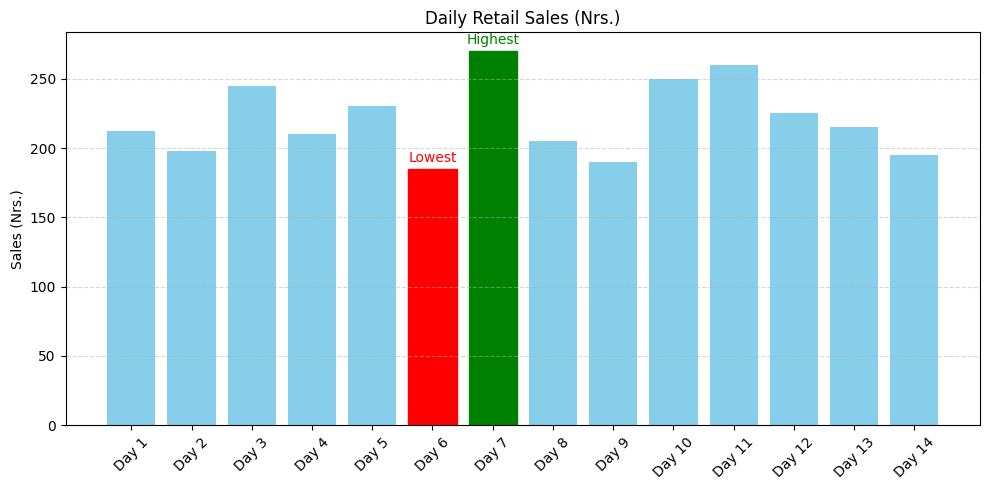

In [3]:
# Daily sales in Nrs. for 14 days
sales = np.array([212, 198, 245, 210, 230, 185, 270, 205, 190, 250, 260, 225, 215, 195])

mean = np.mean(sales)
median = np.median(sales)
mode = stats.mode(sales, keepdims=False).mode  # use keepdims=False for newer SciPy
range_ = np.ptp(sales)  # max - min
variance = np.var(sales)
std_dev = np.std(sales)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Range: {range_}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")




##Bar Chart with Highs and Lows
days = [f'Day {i+1}' for i in range(14)]

plt.figure(figsize=(10, 5))
bars = plt.bar(days, sales, color='skyblue')

# Highlight highest and lowest
max_val = np.max(sales)
min_val = np.min(sales)

for i, val in enumerate(sales):
    if val == max_val:
        bars[i].set_color('green')
        plt.text(i, val + 5, 'Highest', ha='center', color='green')
    elif val == min_val:
        bars[i].set_color('red')
        plt.text(i, val + 5, 'Lowest', ha='center', color='red')

plt.title("Daily Retail Sales (Nrs.)")
plt.ylabel("Sales (Nrs.)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()




In [4]:
# Adjusting for Sunday Sales
adjusted_sales = sales.copy()
sunday_indices = [6, 13]  # 0-based indices for Day 7 and 14
adjusted_sales[sunday_indices] = adjusted_sales[sunday_indices] / 0.8  # undo 20% reduction

adjusted_mean = np.mean(adjusted_sales)
print(f"Adjusted Mean (if Sundays were at normal levels): {adjusted_mean}")



Adjusted Mean (if Sundays were at normal levels): 228.92857142857142


# Case 1- Dropout Risk Assessment


*   Compute and compare the coefficient of variation (CV) for both groups.
*   Interpret: Which group shows greater relative variability in GPA?
*   Suppose 5 of the 30 dropout GPAs were missing. How would that affect your analysis?
*    Discuss limitations of only using mean and standard deviation here—what’s missing?
*    Sketch boxplots to compare GPA distributions between groups.





In [5]:
#1. Compute Coefficient of Variation (CV)
# Dropout group
mean_dropout = 2.1
std_dropout = 0.6
cv_dropout = (std_dropout / mean_dropout) * 100

# Retained group
mean_retained = 3.1
std_retained = 0.5
cv_retained = (std_retained / mean_retained) * 100

print(f"CV (Dropped Out): {cv_dropout:.2f}%")
print(f"CV (Retained): {cv_retained:.2f}%")


CV (Dropped Out): 28.57%
CV (Retained): 16.13%


**Interpretation of CV**:
The Dropped Out group has a higher CV (28.57%) than the Retained group (16.13%), indicating greater relative variability in GPA among students who dropped out. This suggests that dropout students had more inconsistent academic performance in their first year.

**What if 5 dropout GPAs were missing? :**
That would reduce the dropout sample size to 25. The mean and standard deviation might change, especially if the missing values were extreme (very high or very low GPAs). With fewer data points, any estimate (e.g., CV) becomes less reliable due to increased uncertainty.


**Limitations of Mean and Standard Deviation:**

*   Boxplots or histograms are needed to visualize spread and outliers.
*   Mean can be misleading if data is skewed.
*   Do not reveal extreme GPA values
*   They do not show distribution shape



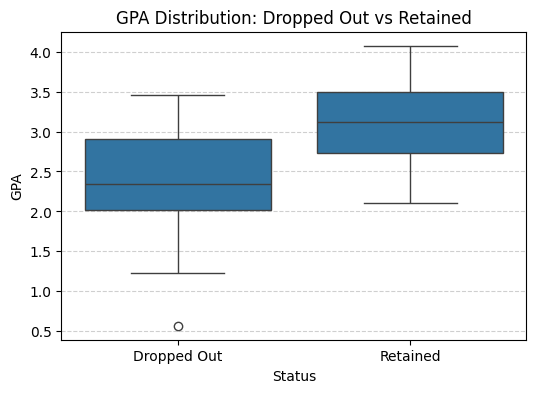

In [6]:
#Sketch Boxplots to Compare GPA Distributions
np.random.seed(0)
gpa_dropout = np.random.normal(loc=2.1, scale=0.6, size=30)
gpa_retained = np.random.normal(loc=3.1, scale=0.5, size=90)

# Combine into a DataFrame
import pandas as pd
df = pd.DataFrame({
    'GPA': np.concatenate([gpa_dropout, gpa_retained]),
    'Status': ['Dropped Out'] * 30 + ['Retained'] * 90
})

# Plot boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Status', y='GPA', data=df)
plt.title("GPA Distribution: Dropped Out vs Retained")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

# Case 2- Gender Pay Gap Investigation

*    Interpret the difference between mean and median in both groups—are outliers likely?
*   Compute and compare IQRs if Q1 and Q3 for males are 90 and 110, and for females are 85
 and 105.
*  Discuss which measure of central tendency best reflects typical salary for each group.
*  Suggest a visualization that could reveal more about potential pay gaps and justify your
 choice.
*   Consider the Simpson's Paradox—how might departmental breakdowns affect these results?






In [9]:
# Provided summary stats (in $1000s)
male_stats = {'mean': 105, 'median': 98, 'std': 18, 'Q1': 90, 'Q3': 110}
female_stats = {'mean': 92, 'median': 90, 'std': 25, 'Q1': 85, 'Q3': 105}

# Function to calculate IQR
def calculate_iqr(q1, q3):
    return q3 - q1

# Function to check for skew
def check_skew(mean, median):
    if mean > median:
        return "Right-skewed (possible high outliers)"
    elif mean < median:
        return "Left-skewed"
    else:
        return "Symmetric"

# Function to recommend central tendency
def best_central_tendency(mean, median):
    if abs(mean - median) > 2:  # arbitrary threshold to flag skew
        return "Median (more robust to outliers)"
    else:
        return "Mean (data appears symmetric)"

In [10]:
print("📊 Gender Pay Gap Analysis")
print("\n1. Skewness:")
print(f" - Male: {check_skew(male_stats['mean'], male_stats['median'])}")
print(f" - Female: {check_skew(female_stats['mean'], female_stats['median'])}")

📊 Gender Pay Gap Analysis

1. Skewness:
 - Male: Right-skewed (possible high outliers)
 - Female: Right-skewed (possible high outliers)


In [12]:
# Compute IQRs
male_iqr = calculate_iqr(male_stats['Q1'], male_stats['Q3'])
female_iqr = calculate_iqr(female_stats['Q1'], female_stats['Q3'])

print("\n2. IQR Comparison:")
print(f" - Male IQR: {male_iqr}")
print(f" - Female IQR: {female_iqr}")


2. IQR Comparison:
 - Male IQR: 20
 - Female IQR: 20


In [13]:
print("\n3. Best Measure of Central Tendency:")
print(f" - Male: {best_central_tendency(male_stats['mean'], male_stats['median'])}")
print(f" - Female: {best_central_tendency(female_stats['mean'], female_stats['median'])}")


3. Best Measure of Central Tendency:
 - Male: Median (more robust to outliers)
 - Female: Mean (data appears symmetric)


In [14]:
print("\n4. Recommended Visualization:")
print(" - Use a Boxplot to compare salary distributions (shows median, spread, and outliers)")


4. Recommended Visualization:
 - Use a Boxplot to compare salary distributions (shows median, spread, and outliers)


In [15]:
print("\n5. Simpson’s Paradox:")
print(" - Overall averages may mislead if gender distribution across departments is uneven.")
print(" - Always compare salaries within similar roles/departments to avoid misinterpretation.")


5. Simpson’s Paradox:
 - Overall averages may mislead if gender distribution across departments is uneven.
 - Always compare salaries within similar roles/departments to avoid misinterpretation.


# Case 3- Fitness Tracker Accuracy:


*   Which tracker has more consistent measurements? Use CV to justify.
*  Why might Tracker B have higher mean but lower median?
*  Interpret how IQR and SD together inform the nature of variability.  
* A user claims Tracker B is ”more optimistic.” How would you statistically evaluate this
 claim?
*   Propose a statistical report layout for a consumer review site
  





In [19]:
# Given summary statistics
tracker_A = {'mean': 8050, 'std': 310, 'median': 8000, 'iqr': 430}
tracker_B = {'mean': 8250, 'std': 800, 'median': 8100, 'iqr': 1100}

# 1. Coefficient of Variation (CV)
def coefficient_of_variation(std, mean):
    return (std / mean) * 100

cv_A = coefficient_of_variation(tracker_A['std'], tracker_A['mean'])
cv_B = coefficient_of_variation(tracker_B['std'], tracker_B['mean'])

print("📊 Fitness Tracker Accuracy Analysis")

print("\n1. Coefficient of Variation (lower = more consistent):")
print(f" - Tracker A CV: {cv_A:.2f}%")
print(f" - Tracker B CV: {cv_B:.2f}%")
if cv_A < cv_B:
    print("  Tracker A is more consistent in measurements.")
else:
    print("  Tracker B is more consistent in measurements.")

# 2. Why higher mean but lower median?
print("\n2. Why does Tracker B have a higher mean but lower median?")
if tracker_B['mean'] > tracker_B['median']:
    print(" - Tracker B likely has right-skewed data with high outliers increasing the mean.")
else:
    print(" - Data might be symmetric or left-skewed.")

# 3. Variability interpretation
print("\n3. Interpreting IQR and SD together:")
print(f" - Tracker A: IQR = {tracker_A['iqr']}, SD = {tracker_A['std']}")
print(f" - Tracker B: IQR = {tracker_B['iqr']}, SD = {tracker_B['std']}")
print(" - Tracker B has much higher IQR and SD → indicates more day-to-day inconsistency and outliers.")

# 4. Is Tracker B 'more optimistic'?
print("\n4. Evaluating 'more optimistic' claim:")
print(" - Tracker B has a higher average step count (mean = 8250 vs 8050).")
print(" - If tested statistically (e.g., paired t-test or Wilcoxon), we could check if the difference is significant.")
print(" - Without raw data, we assume B is more 'optimistic' in step count reporting due to higher average and variability.")


print("\n5. Suggested Report Layout for Consumer Review Site:")
print("""
--------------------------------------------
 Fitness Tracker Accuracy Summary
--------------------------------------------
1. Summary Table (Mean, Median, SD, IQR)
2. Visual Charts:
   - Boxplots comparing step count ranges
   - Line chart for daily step consistency (if data available)
3. Consistency Score (based on CV)
4. Optimism Score (based on average overcount compared to benchmark or competition)
5. Reviewer Verdict (which to buy and why)
""")



📊 Fitness Tracker Accuracy Analysis

1. Coefficient of Variation (lower = more consistent):
 - Tracker A CV: 3.85%
 - Tracker B CV: 9.70%
  Tracker A is more consistent in measurements.

2. Why does Tracker B have a higher mean but lower median?
 - Tracker B likely has right-skewed data with high outliers increasing the mean.

3. Interpreting IQR and SD together:
 - Tracker A: IQR = 430, SD = 310
 - Tracker B: IQR = 1100, SD = 800
 - Tracker B has much higher IQR and SD → indicates more day-to-day inconsistency and outliers.

4. Evaluating 'more optimistic' claim:
 - Tracker B has a higher average step count (mean = 8250 vs 8050).
 - If tested statistically (e.g., paired t-test or Wilcoxon), we could check if the difference is significant.
 - Without raw data, we assume B is more 'optimistic' in step count reporting due to higher average and variability.

5. Suggested Report Layout for Consumer Review Site:

--------------------------------------------
 Fitness Tracker Accuracy Summary

# Case 5- E- Commerce Performance:

*  Calculate and compare CVs.
 Determine which group is more skewed and explain the implication.
*   Calculate and compare CVs.

* Suppose a campaign increased new user spending on a few days. How would that affect
 measures?  
*  Propose at least 2 descriptive statistics techniques for business insights here




In [21]:

returning_users = {'mean': 110, 'std': 22, 'median': 108}
new_users = {'mean': 95, 'std': 35, 'median': 80}


#Step 2: Calculate Coefficient of Variation (CV)
def coefficient_of_variation(std, mean):
    return (std / mean) * 100

cv_returning = coefficient_of_variation(returning_users['std'], returning_users['mean'])
cv_new = coefficient_of_variation(new_users['std'], new_users['mean'])

print("1. Coefficient of Variation:")
print(f" - Returning Users CV: {cv_returning:.2f}%")
print(f" - New Users CV: {cv_new:.2f}%")

if cv_returning < cv_new:
    print("  Returning users are more consistent in cart value.")
else:
    print("  New users are more variable in spending.")

# Step 3: Check for Skewness Based on Mean vs Median
def interpret_skew(mean, median):
    if mean > median:
        return "Right-skewed (high spenders pulling up the average)"
    elif mean < median:
        return "Left-skewed (some very low values pulling down the average)"
    else:
        return "Symmetric distribution"

print("\n2. Skewness Interpretation:")
print(f" - Returning Users: {interpret_skew(returning_users['mean'], returning_users['median'])}")
print(f" - New Users: {interpret_skew(new_users['mean'], new_users['median'])}")


#Step 4: Campaign Impact on Spending
print("\n3. Campaign Impact on Metrics:")
print(" - A few days of higher spending by new users will increase the mean,")
print("   but may not change the median much if the rest of the data remains low.")
print(" - This could make the data more right-skewed and increase the standard deviation.")


 #Step 5: Recommend Descriptive Stats for Business Insights
print("\n4. Recommended Descriptive Stats Techniques:")

print(" - a) Use Boxplots to compare daily cart value distributions and spot outliers.")
print(" - b) Use Time Series Plot to track daily spending trends and campaign impact over time.")
print(" - c) Track Percentiles (e.g., 25th, 50th, 75th) to understand user segments.")
print(" - d) Use Moving Averages to monitor smoothing trends in user spending behavior.")




1. Coefficient of Variation:
 - Returning Users CV: 20.00%
 - New Users CV: 36.84%
  Returning users are more consistent in cart value.

2. Skewness Interpretation:
 - Returning Users: Right-skewed (high spenders pulling up the average)
 - New Users: Right-skewed (high spenders pulling up the average)

3. Campaign Impact on Metrics:
 - A few days of higher spending by new users will increase the mean,
   but may not change the median much if the rest of the data remains low.
 - This could make the data more right-skewed and increase the standard deviation.

4. Recommended Descriptive Stats Techniques:
 - a) Use Boxplots to compare daily cart value distributions and spot outliers.
 - b) Use Time Series Plot to track daily spending trends and campaign impact over time.
 - c) Track Percentiles (e.g., 25th, 50th, 75th) to understand user segments.
 - d) Use Moving Averages to monitor smoothing trends in user spending behavior.
